# Mobile Games A/B Testing Analysis

## Project Overview

The Mobile Games A/B Testing project focuses on analyzing the results of an A/B test conducted on a mobile game. In this test, users are split into two groups:

- Group A (Control): These users experience the game in its original form.
- Group B (Test): These users experience a variation of the game (with a modified feature or content).
 
 ## Key Objectives:
- Exploratory Data Analysis (EDA): Understand the structure of the dataset, including group distributions and conversion rates.
- Calculate Conversion Rates: Compare the conversion rates of users in Group A (control) and Group B (test) to see if there is a difference.
- Statistical Significance Testing: Use a statistical test (like the t-test) to determine whether the difference in conversion rates between the two groups is statistically significant.
- Business Insights: Interpret the results and provide insights or recommendations based on whether the variation in Group B leads to a better conversion rate.

In [1]:
# Let's import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's load the dataset 
df = pd.read_csv('../input/mobile-games-ab-testing/cookie_cats.csv')

# Let's display the first few rows of the dataset
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
# Let's check the structure and data types
df.info()

# Let's check for missing values
df.isnull().sum()

# Let's summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


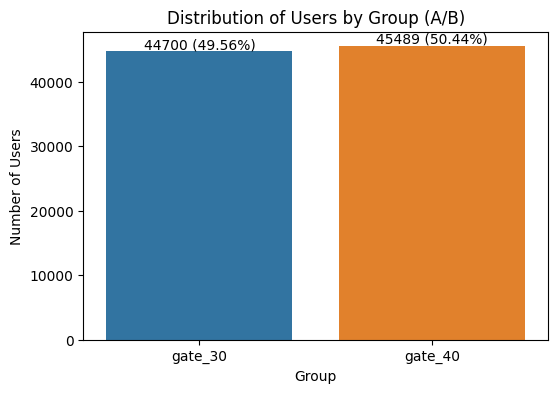

In [3]:
# Let's count the number of users in each group
freq_by_ver = df['version'].value_counts(ascending=True)

perc_values = round((freq_by_ver / freq_by_ver.sum()) * 100, 2).values
labels = [f'{item[0]} ({item[1]}%)' for item in zip(freq_by_ver.values, perc_values)]

plt.figure(figsize=(6,4))
tbl = sns.countplot(x='version', data=df)
plt.title('Distribution of Users by Group (A/B)')
plt.xlabel('Group')
plt.ylabel('Number of Users')
plt.bar_label(container = tbl.containers[0], labels = labels)
plt.show()

In [4]:
# Let's calculate the conversion rate for each group
retention_1_rate = df.groupby('version')['retention_1'].mean()

retention_7_rate = df.groupby('version')['retention_7'].mean()

# Let's print retention rates
print('Retention Rate 1:')
print(retention_1_rate)
print('Retention Rate 7:')
print(retention_7_rate)

Retention Rate 1:
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64
Retention Rate 7:
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


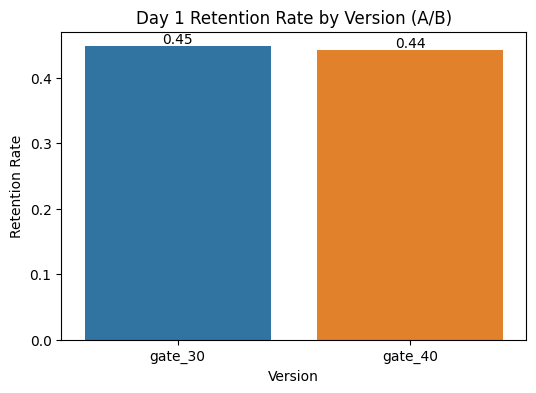

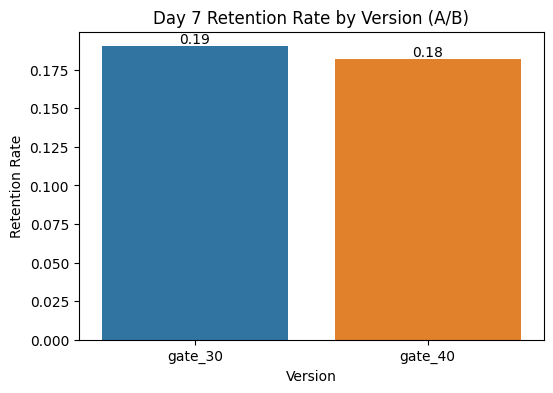

In [5]:
# Let's visualize retention rate for day 1
plt.figure(figsize=(6,4))
tbl = sns.barplot(x=retention_1_rate.index, y=retention_1_rate.values)
plt.title('Day 1 Retention Rate by Version (A/B)')
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.bar_label(container = tbl.containers[0], labels = [f'{r1:.2f}' for r1 in retention_1_rate.values])
plt.show()

# Let's visualize retention rate for day 7
plt.figure(figsize=(6,4))
tbl1 = sns.barplot(x=retention_7_rate.index, y=retention_7_rate.values)
plt.title('Day 7 Retention Rate by Version (A/B)')
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.bar_label(container = tbl1.containers[0], labels = [f'{r1:.2f}' for r1 in retention_7_rate.values])
plt.show()

# What is T-Test ?

**T-statistic:** The t-statistic tells us how different the two groups (A and B) are in terms of retention. The larger the t-statistic, the greater the difference.

**P-value:** The p-value helps us determine whether the difference between the two groups is statistically significant.

- If p-value < 0.05, the difference is considered statistically significant, meaning the test version likely had an impact on retention.
- If p-value >= 0.05, the difference is not statistically significant, meaning the variation might not have made a meaningful impact.

In [6]:
from scipy import stats

# Let's perform a T-Test for Day 1 Retention
# Let's split the data into two groups: A (control) and B (test)
df['retention_1'] = df['retention_1'].astype(int)
df['retention_7'] = df['retention_7'].astype(int)

group_a_day1 = df[df['version'] == 'gate_30']['retention_1']
group_b_day1 = df[df['version'] == 'gate_40']['retention_1']

# Let's perform an independent t-test for Day 1 retention

t_stat_day1, p_value_day1 = stats.ttest_ind(group_a_day1, group_b_day1)

print(f'Day 1 Retention - T-statistic: {t_stat_day1}, P-value: {p_value_day1}')

# Let's perform a T-Test for Day 7 Retention

group_a_day7 = df[df['version'] == 'gate_30']['retention_7']
group_b_day7 = df[df['version'] == 'gate_40']['retention_7']

# Let's perform an independent t-test for Day 7 retention

t_stat_day7, p_value_day7 = stats.ttest_ind(group_a_day7, group_b_day7)

print(f'Day 7 Retention - T-statistic: {t_stat_day7}, P-value: {p_value_day7}')

Day 1 Retention - T-statistic: 1.7840979256519656, P-value: 0.07441111525563184
Day 7 Retention - T-statistic: 3.1644994996802778, P-value: 0.0015540151201088365


## Let's summarizes our findings

1. **Day 1 Retention:**
   - T-statistic: 1.784
   - P-value: 0.0744
   
- *The p-value of 0.0744 is greater than 0.05, which means the difference in Day 1 retention between the control group and the test group is not statistically significant.*
- *Although the test group showed a slightly higher retention rate on day 1 (as indicated by the positive t-statistic), the difference could be due to random variation, and we cannot confidently conclude that the test version improved retention after one day.*

2. **Day 7 Retention:**
   - T-statistic: 3.164
   - P-value: 0.00155
- *The p-value of 0.00155 is much lower than 0.05, indicating a statistically significant difference in Day 7 retention between the control and test groups.*
- *The positive t-statistic suggests that the test group (version B) had a significantly higher retention rate on day 7 compared to the control group. This means the variation introduced in the test version appears to have had a positive effect on long-term retention.*

## Business Recommendations 

- *Since Day 7 retention showed a statistically significant improvement in the test group, it suggests that the changes introduced in version B had a positive impact on keeping players engaged over the long term.*

- *Although the Day 1 retention difference wasn't statistically significant, the increase in Day 7 retention is a strong indicator that the test version can be rolled out more widely.*

- *It might be beneficial to continue monitoring the Day 1 retention and explore other optimizations for short-term engagement, but the results indicate that version B is more effective at retaining users over a week.*